<a href="https://colab.research.google.com/github/DinhQuocTuan0108/Bai-tap/blob/main/NHAN_DIEN_KHUON_MAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

In [54]:
%cd /content/drive/MyDrive/Colab_Notebooks/NHAN_DIEN_KHUON_MAT

/content/drive/MyDrive/Colab Notebooks/NHAN_DIEN_KHUON_MAT


In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [56]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/NHAN_DIEN_KHUON_MAT/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 87 images belonging to 2 classes.


In [57]:
training_set.class_indices

{'CO': 0, 'KO': 1}

In [58]:
x_train,y_train=next(training_set)

In [59]:
x_train.shape

(32, 150, 150, 3)

In [60]:
y_train.shape

(32, 2)

In [61]:
x_train=x_train.reshape(32,67500)
x_train=x_train.astype ('float32')
x_train=x_train/255

In [62]:
x_train.shape

(32, 67500)

In [63]:
y_train.shape

(32, 2)

In [64]:
# Tạo ra mạng ANN để train mô hình
model=Sequential()
# Tạo lớp ẩn thứ nhất với 67500 tín hiệu vào và có 4 tín hiệu ra sử dụng hàm relu
model.add(Dense(4,activation='relu',input_shape=(67500,)))
# Tạo lớp ẩn thứ hai với 4 tín hiệu vào và có 50 tín hiệu ra sử dụng hàm relu
model.add(Dense(50,activation='relu'))
# Tạo lớp ẩn thứ ba với 50 tín hiệu vào và có 50 tín hiệu ra sử dụng hàm relu
model.add(Dense(50,activation='relu'))
# Tạo lớp ẩn thứ tư với 50 tín hiệu vào, 2 tín hiệu ra ra sử dụng hàm softmax
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 270004    
                                                                 
 dense_21 (Dense)            (None, 50)                250       
                                                                 
 dense_22 (Dense)            (None, 50)                2550      
                                                                 
 dense_23 (Dense)            (None, 2)                 102       
                                                                 
Total params: 272,906
Trainable params: 272,906
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Biên dịch 
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=["accuracy"])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣10 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(x_train,y_train,epochs=50, batch_size=10,verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/50
3/3 [==============================] - 1s 99ms/step - loss: 0.6922 - accuracy: 0.4800 - val_loss: 0.6697 - val_accuracy: 0.8571
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 0.6488 - accuracy: 0.8000 - val_loss: 0.5430 - val_accuracy: 0.8571
Epoch 3/50
3/3 [==============================] - 0s 22ms/step - loss: 0.5432 - accuracy: 0.8000 - val_loss: 0.4525 - val_accuracy: 0.8571
Epoch 4/50
3/3 [==============================] - 0s 21ms/step - loss: 0.4774 - accuracy: 0.8000 - val_loss: 0.3972 - val_accuracy: 0.8571
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 0.4412 - accuracy: 0.8000 - val_loss: 0.3579 - val_accuracy: 0.8571
Epoch 6/50
3/3 [==============================] - 0s 23ms/step - loss: 0.4272 - accuracy: 0.8000 - val_loss: 0.3543 - val_accuracy: 0.8571
Epoch 7/50
3/3 [==============================] - 0s 21ms/step - loss: 0.4141 - accuracy: 0.8000 - val_loss: 0.3304 - val_accuracy: 0.8571
Epoch 8/50
3/3 [===========

In [66]:
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.10330504179000854
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

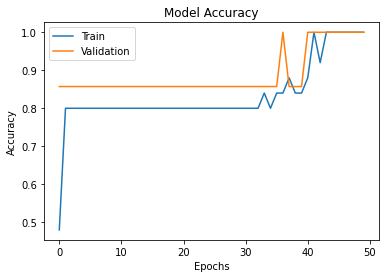

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [68]:
model.save("Nhan_dien_khuon_mat.h5")

In [69]:
model_ANN=load_model('Nhan_dien_khuon_mat.h5')

1/1 [==============================] - 0s 68ms/step
CO TUAN


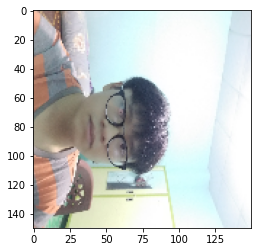

In [70]:
img=load_img('/content/drive/MyDrive/Colab_Notebooks/NHAN_DIEN_KHUON_MAT/TEST/20221024_195643.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,67500)
img=img.astype('float32')
img=img/255
result=np.argmax(model_ANN.predict(img),axis=1)
if result==0:
  prediction="CO TUAN"
if result==1:
  prediction="KHONG CO TUAN"
print(prediction)


1/1 [==============================] - 0s 19ms/step
KHONG CO TUAN


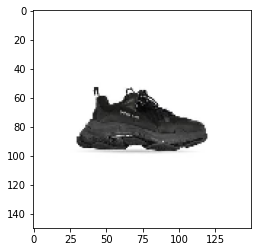

In [72]:
img=load_img('/content/drive/MyDrive/Colab_Notebooks/NHAN_DIEN_KHUON_MAT/TEST/Sneaker.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,67500)
img=img.astype('float32')
img=img/255
result=np.argmax(model_ANN.predict(img),axis=1)
if result==1:
  prediction="CO TUAN"
if result==0:
  prediction="KHONG CO TUAN"
print(prediction)